Refer SKlearn official Documnetation if you are not sure about syntax or parameter .

https://scikit-learn.org/stable/index.html

In [1]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/wine.csv')
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol Alcohol_content  quality  
0      9.4             Low        5  
1      9.8          Medium        5  
2      9.8          Medium        5  
3      9.8          Medium        6  
4      9.4             Low        5

In [4]:
data.shape

(1599, 13)

The dataset contains 1599 rows and 13 columns.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  Alcohol_content       1599 non-null   object 
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [6]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [7]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

There are no null values found

As we hvae categorical column(Alcohol_content) we need to convert into numeric data using encoding method.

Content is following same like low medium high . we need to give weight according to the order .

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
df = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df1 = df.fit_transform(data[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

In [10]:
data['Alcohol_content']=df1

In [11]:
#Checking Multicollinearity problem and relationship

# Plotting Heatmap (Correaltion Matrix)

In [12]:
df_corr=data.corr().abs()

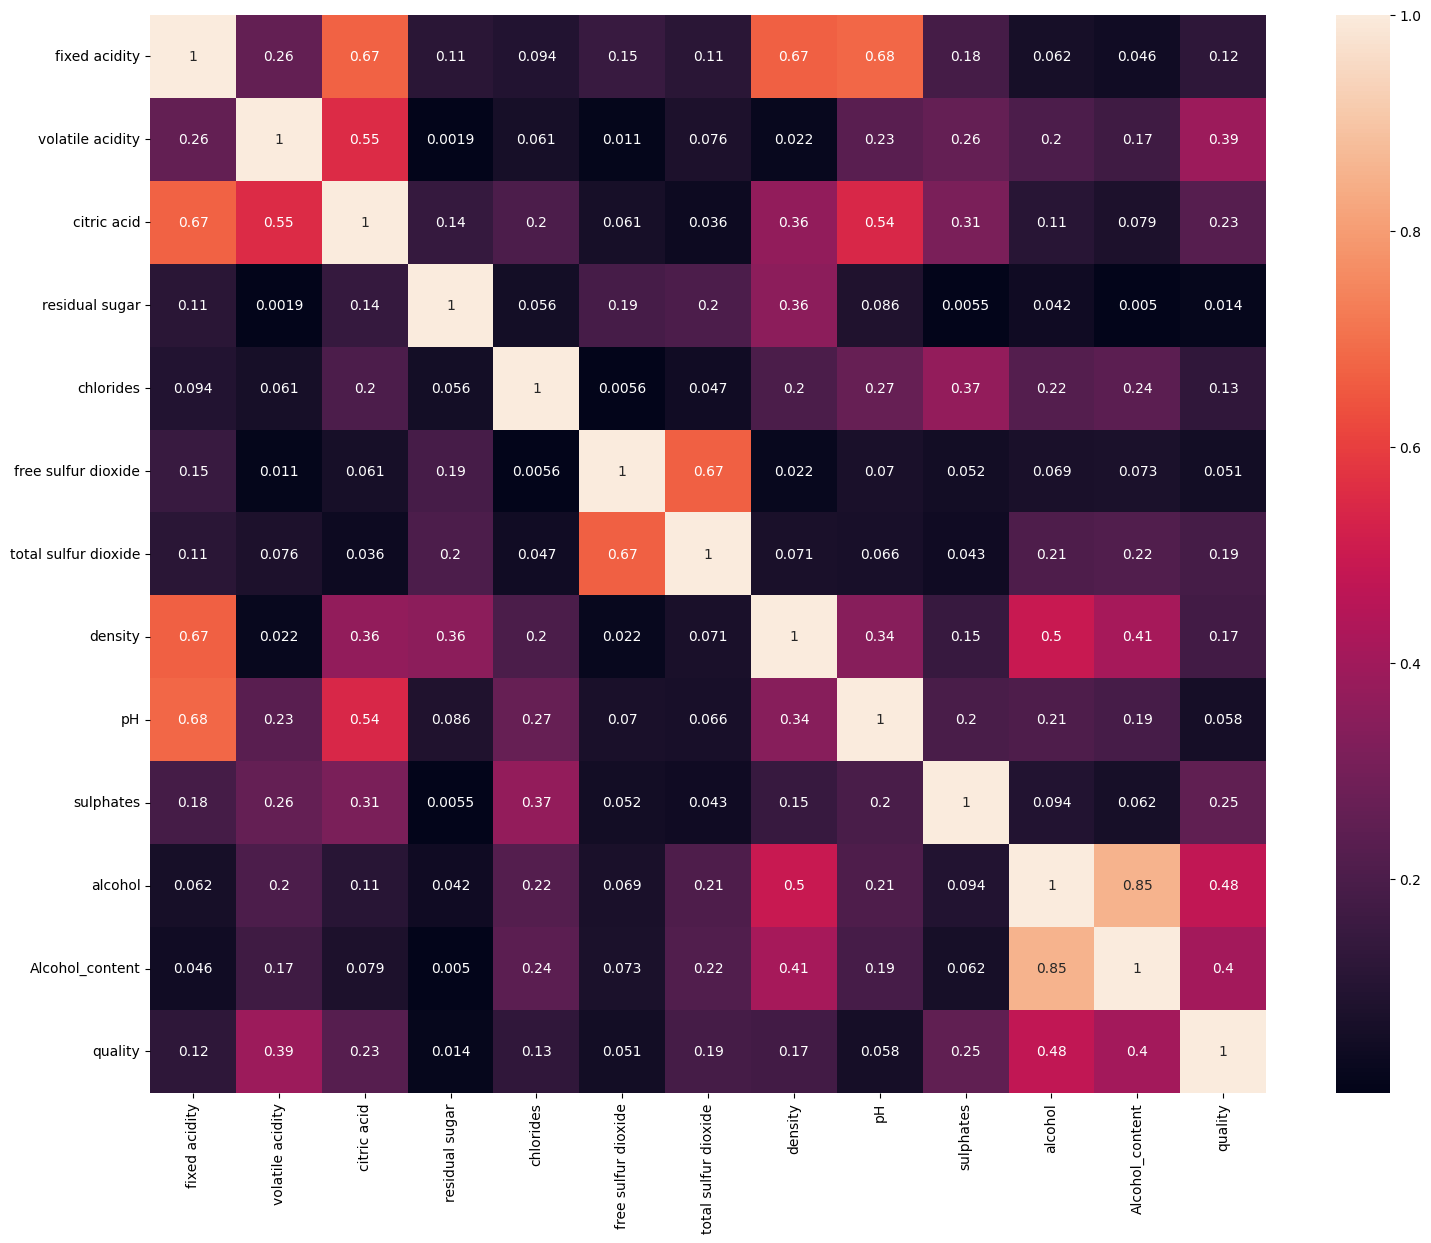

In [13]:
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

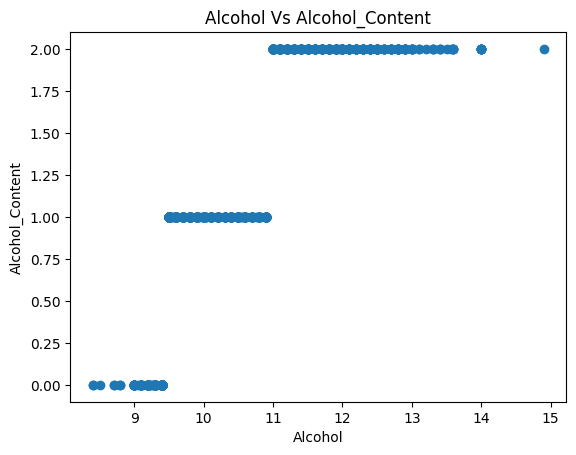

In [14]:
plt.scatter(data.alcohol,data.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Alcohol_Content')
plt.title('Alcohol Vs Alcohol_Content')
plt.show()

As and when alcohol level increases its content also increasing . so we can delete one of them.

In [15]:
# Let's prepare the data for modeling by removing the 'Alcohol_content' feature from the predictors and setting 'quality' as the target variable.
x = data.drop(columns=['Alcohol_content', 'quality'])
y = data.quality

In [16]:
#lets split the data into a train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=420)

Here we are not going to use Standard Scaler because decision tree will take care of that, we don't need to standadize the data in the decision tree.

In [17]:
#Train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
y_pred = dt.predict(x_test)

In [20]:
y_test[:10]

792     6
910     6
561     5
144     6
302     5
458     7
1439    6
432     6
707     5
109     5
Name: quality, dtype: int64

In [21]:
#accuracy of the model
acc_score = accuracy_score(y_test,y_pred)
acc_score

0.6175

In [22]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[  0,   0,   1,   0,   0,   0],
       [  0,   3,   3,   0,   1,   0],
       [  0,   4, 109,  41,   9,   0],
       [  0,   2,  36, 106,  27,   2],
       [  0,   1,   5,  12,  27,   2],
       [  0,   0,   0,   5,   2,   2]], dtype=int64)

In [24]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.30      0.43      0.35         7
           5       0.71      0.67      0.69       163
           6       0.65      0.61      0.63       173
           7       0.41      0.57      0.48        47
           8       0.33      0.22      0.27         9

    accuracy                           0.62       400
   macro avg       0.40      0.42      0.40       400
weighted avg       0.63      0.62      0.62       400



# Visualize the Decision Tree

In [27]:
from sklearn.tree import export_graphviz
import subprocess

# Export the decision tree as a DOT file
export_graphviz(dt, out_file='tree.dot', 
                feature_names=x.columns,  
                class_names=[str(cls) for cls in y.unique()],
                filled=True, rounded=True,
                special_characters=True)

# Convert the DOT file to a PDF file using Graphviz
subprocess.run(['dot', '-Tpdf', 'tree.dot', '-o', 'tree.pdf'], check=True)

CompletedProcess(args=['dot', '-Tpdf', 'tree.dot', '-o', 'tree.pdf'], returncode=0)